In [162]:
import pandas as pd
from janome.tokenizer import Tokenizer
from collections import Counter, defaultdict
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# col_names = [ 'c{0:02d}'.format(i) for i in range(2) ]
col_names = ['tweet','created_at']

df_f = pd.read_csv("tweet(kw_リノベーション).csv", sep=',', names=col_names)
df_lyric = pd.read_csv("max",names=['lyric'])

pn_df = pd.read_csv('pn_ja.dic.txt', 
                   sep = ':',
                   encoding='utf-8',
                   names=('Word','Reading','POS','PN')
                   )

In [117]:
# ====================
# PN tableを辞書化
# ====================

word_list = list(pn_df['Word'])
pn_list = list(pn_df['PN'])
pn_dict = dict(zip(word_list, pn_list))

In [154]:
# ====================
# 形態素解析関数
# ====================
def counter(tw_list):
    t = Tokenizer()
    words_count = defaultdict(int)
    words = []
    all_word = [] #全品詞用
    for text in tw_list:
        tokens = t.tokenize(text)
        for token in tokens:
            pos = token.part_of_speech.split(',')[0]
            all_word.append(token.base_form)
            if pos == '名詞':
                words_count[token.base_form] += 1
                words.append(token.base_form)
    return words_count, words, all_word

In [178]:
# ====================
# ひたすら前処理(twitter)
# ====================
# tweet用
texts = []
df_tweet = df_f['tweet']

for row in df_tweet:
    text = row.split('http')
    text = text[0]
    texts.append(text)

tw_list = []    
for i in range(len(texts)):
    if 'RT' in texts[i]:
        pass
    else:
        tw_list.append(texts[i])

# tweet内の文字数カウント
df_count = [len(tw) for tw in tw_list]

# ====================
# ひたすら前処理(Lyric)
# ====================
# 歌詞用
lyric_list = list(df_lyric['lyric'])

In [157]:
# ====================
#　janomeで形態素解析(変数はリストで)
# ====================
words_count, words, all_word = counter(lyric_list)

In [158]:
# ====================
#　解析後のデータ整形
# ====================
clear_words = []
for i in range(len(words)):
    if len(words[i]) <= 1:
        pass
    else:
        clear_words.append(words[i])

clear_all_word = []
for i in range(len(all_word)):
    if len(all_word[i]) <= 1:
        pass
    else:
        clear_all_word.append(all_word[i])

In [143]:
# ====================
#　結果に単語ごとPN値を追加する関数
# ====================
def add_pnvalue(diclist_old):
    pn_list = []
    text_list = []
    for word in diclist_old:
        if word in pn_dict:
            pn = float(pn_dict[word])
            pn_list.append(pn)
            text_list.append(word)
        else:
            pass
    return pn_list, text_list

In [159]:
# ====================
#　有効なPN値とテキストをまーじ
# ====================
pn_list, text_list = add_pnvalue(clear_all_word)

df = pd.DataFrame({
    'text':text_list,
    'PN':pn_list,               
                  },columns=['text','PN'])

df['PN'].sum()

-72.06995254

(array([  20.,  173.,  737.,  565.,  454.,  386.,  418.,  359.,  403.,  108.]),
 array([   0.,   14.,   28.,   42.,   56.,   70.,   84.,   98.,  112.,
         126.,  140.]),
 <a list of 10 Patch objects>)

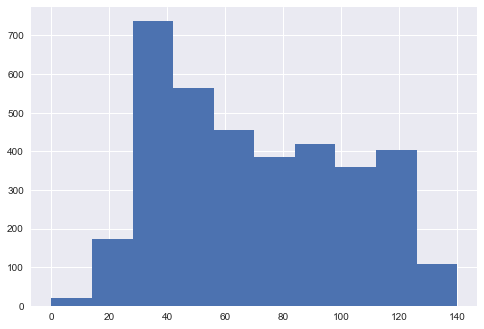

In [177]:
# ====================
# pandasで簡単に状況把握
# ====================
sns.set()

# df = pd.DataFrame(clear_words, columns=['word'])
# df['count'] = 1
# df = df.groupby('word').sum().sort_values(by='count', ascending=False)
# df_count = df[df['count'] >50]
# df_count = df[df['count'] < 3000]
# df_count.hist(column='count')

# plt.plot(pn_list)
# plt.xlim(0,150)

plt.hist(df_count)